In [1]:
# Importing the required libraries
import pandas as pd

In [80]:

# readong the csv file using pandas library
data = pd.read_excel(r'C:\Users\pavan\Downloads\Book1.xlsx')


In [81]:
# Observing the first 5 records
data.head()

,Task,Duration,Predecessor
0,1 Assess the situation,15min,NaN
1,2 Gather supplies,10min,1.0
2,3 sort and declutter,3hours,2.0
3,4 Oraganize items,2 hours,3.0
4,5.Eliminate dust and cobewbs,20min,4.0


In [82]:
# Observing the shape of the dataframe
data.shape

(10, 3)

In [83]:
# Observing the column names in the dataframe
data.columns

Index(['Task', 'Duration', 'Predecessor'], dtype='object')

In [84]:
# Observing the data types in the dataframes
data.dtypes

Task            object
Duration        object
Predecessor    float64
dtype: object

In [85]:
# Describe the statistical description of the data
data.describe()

,Predecessor
count,9.000000
mean,5.000000
std,2.738613
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [86]:
# In this describe method, checking the statistical description of the dtype:object of the columns in the dataframe
data.describe(include='O')

,Task,Duration
count,10,10
unique,10,7
top,1 Assess the situation,20min
freq,1,3


In [87]:
# Creating a new column length from the text column dataframe 
data['length']=data['Task'].str.len()

In [88]:
# Observing the sum of the null values in the dataframes
data.isna().sum()

Task           0
Duration       0
Predecessor    1
length         0
dtype: int64

In [89]:
# Replacing the na values with the unknown value
data['Predecessor'].fillna('unknown',inplace=True)
data.isna().sum()

Task           0
Duration       0
Predecessor    0
length         0
dtype: int64

In [90]:
# Observing the unique speakers in the column name in the dataframe
data['Task'].unique()

array(['1 Assess the situation', ' 2 Gather supplies',
       ' 3 sort and declutter', '4 Oraganize items',
       '5.Eliminate dust and cobewbs',
       '6 stain removal and spot cleaning', '7 floor mopping',
       '8 complete examination and adjustments', '9 Trash disposal',
       '10 let the garage air out'], dtype=object)

In [91]:
# Checking whether the string contains bush
data[data['Task'].str.contains('Assess the situation')]

,Task,Duration,Predecessor,length
0,1 Assess the situation,15min,unknown,22


<Axes: >

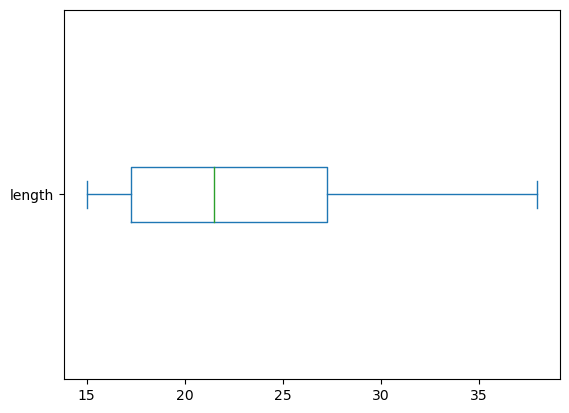

In [92]:
# Plotting boxplot for the column length
data['length'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

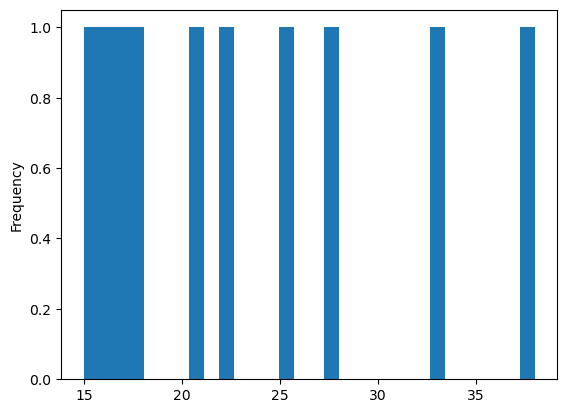

In [93]:
# Plotting histogram for the column length
data['length'].plot(kind='hist', bins=30)

C:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


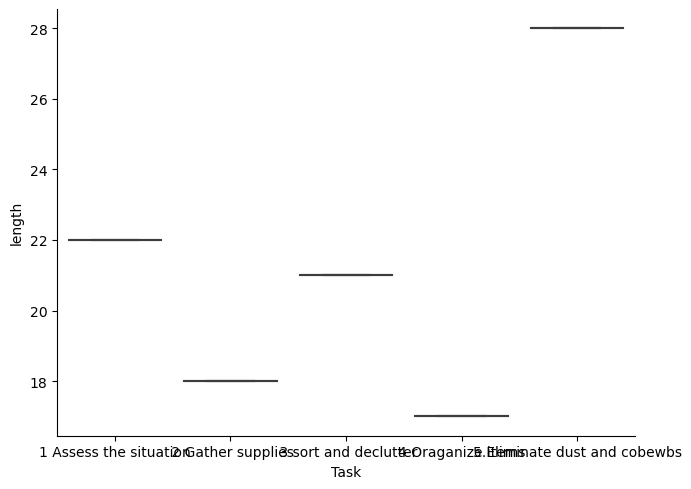

In [100]:
# Plotting boxplot for the column countries ['USA', 'FRA', 'GBR', 'CHN', 'RUS']
import seaborn as sns
where = data['Task'].isin(['1 Assess the situation',' 2 Gather supplies',' 3 sort and declutter','4 Oraganize items','5.Eliminate dust and cobewbs'])

g = sns.catplot(data=data[where], x="Task", y="length", kind='box', orient='v')

g.fig.set_size_inches(8, 5)

In [39]:
# Importing the stopwords from the nltk library
import nltk
nltk.download('stopwords')
stopwords= set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
# importing regular expression 
import re

# Creating the tokenize function
def tokenize(text):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', text)



In [101]:
# Passing a sentence to break down into tokens
testtext = "I am Minukuri Pavani"
testtokens = tokenize(testtext)
print(testtokens)

['I', 'am', 'Minukuri', 'Pavani']


In [102]:
# Creating the function for the stopwords removal
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Minukuri', 'Pavani']


In [103]:
# creating pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    # Apply each function in the pipeline to the text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [105]:
data['tokens'] = data['Task'].apply(prepare, pipeline=pipeline)


In [106]:
data['tokens']

0                     [assess, situation]
1                      [gather, supplies]
2                       [sort, declutter]
3                      [oraganize, items]
4              [eliminate, dust, cobewbs]
5        [stain, removal, spot, cleaning]
6                        [floor, mopping]
7    [complete, examination, adjustments]
8                       [trash, disposal]
9                      [let, garage, air]
Name: tokens, dtype: object

In [107]:
# Creating a new column num_tokens
data['num_tokens'] = data['tokens'].map(len)
data.tail()

,Task,Duration,Predecessor,length,tokens,num_tokens
5,6 stain removal and spot cleaning,40 min,5.0,33,"[stain, removal, spot, cleaning]",4
6,7 floor mopping,20min,6.0,15,"[floor, mopping]",2
7,8 complete examination and adjustments,40min,7.0,38,"[complete, examination, adjustments]",3
8,9 Trash disposal,20min,8.0,16,"[trash, disposal]",2
9,10 let the garage air out,10min,9.0,25,"[let, garage, air]",3


# Word frequencyAnalysis

In [108]:
# importing the counter from counter
from collections import Counter
tokens = tokenize("My favourite hobby is travelling")
testcount= Counter(tokens)
print(testcount)

Counter({'My': 1, 'favourite': 1, 'hobby': 1, 'is': 1, 'travelling': 1})


In [109]:
#You can also add new data to the currentcount
more_tokens = tokenize("and also like to play games")
testcount.update(more_tokens)
print(testcount)

Counter({'My': 1, 'favourite': 1, 'hobby': 1, 'is': 1, 'travelling': 1, 'and': 1, 'also': 1, 'like': 1, 'to': 1, 'play': 1, 'games': 1})


In [110]:
counter = Counter()
data['tokens'].map(counter.update)
print(counter.most_common(5))

[('assess', 1), ('situation', 1), ('gather', 1), ('supplies', 1), ('sort', 1)]


In [111]:
#Now, we put the word frequency in it’s owndataframe for analysis
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [63]:
#Sort and display
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [64]:
# Statistical Discription
freq_df.describe()

,freq
count,68294.000000
mean,162.705186
std,1544.169618
min,1.000000
25%,1.000000
50%,2.000000
75%,15.000000
max,124508.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

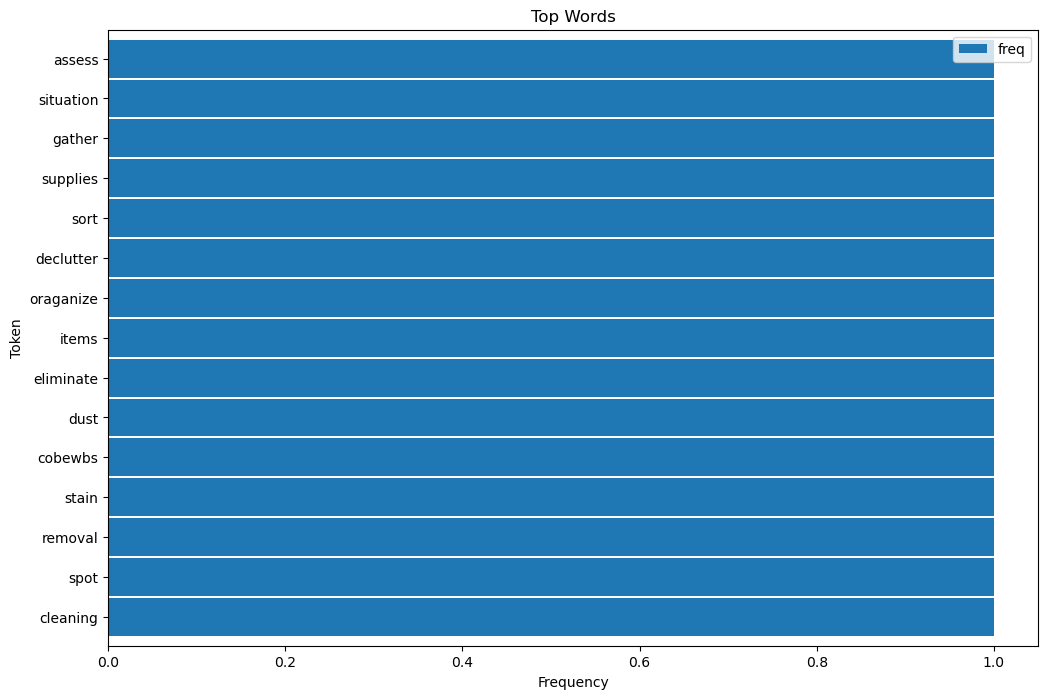

In [112]:
# Bar chart
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [68]:
# installing the wordcloud 
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ----------------- ---------------------- 133.1/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 199.5, -0.5)

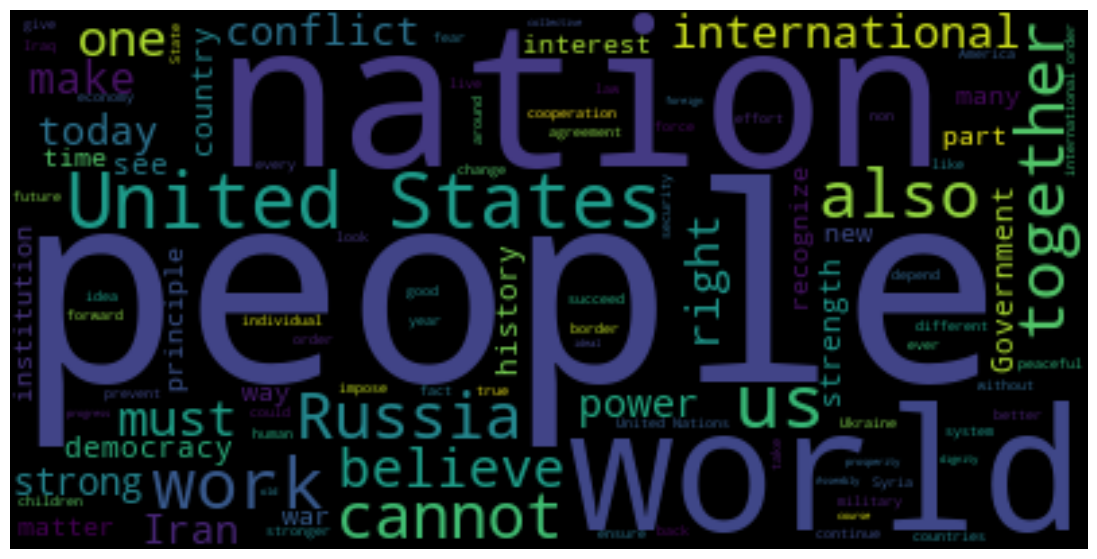

In [70]:
#Word cloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = data.query("year==2015 and country=='USA'")['text'].values[0]
plt.figure(figsize=(14, 7)) 
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

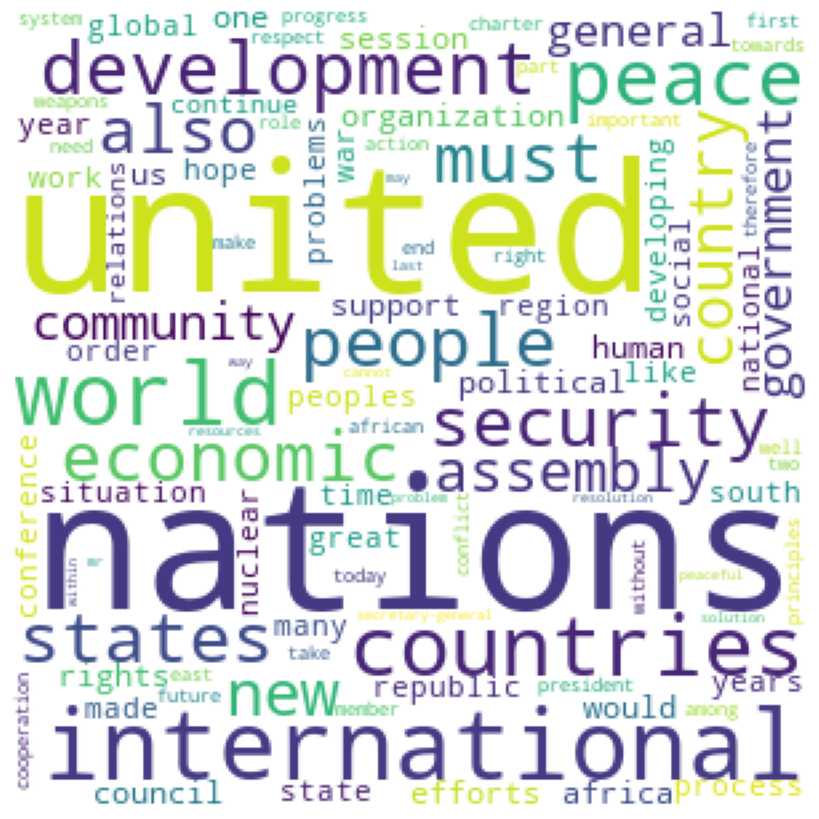

In [72]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()